# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**See PrairieLearn for _due date_ and _submission_**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md).

Test score: 0.543444

## Imports

In [54]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_There are a total of 24 variables besides the ID of each example. Of the 24, there are two binary variables - sex and default payment next month, eight categorical variables (education, marriage, and repayment status over six months - six ordinal columns in total), and 14 numerical variables (credit limit, age, amount of bill payment over six months, and amount of previous payment over six months). The target variable is the binary column: default payment next month._

In [55]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Type your answer here, replacing this text._

In [56]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=76)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [57]:
# separate X and y
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]

X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

In [58]:
pd.options.display.max_columns = None
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15011.587619,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,-0.265762,-0.287381,51100.594571,48965.462714,4.684151e+04,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,8658.232639,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,1.134210,1.152388,73651.958111,71005.547417,6.939829e+04,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7493.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3526.750000,2946.000000,2.632750e+03,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,15041.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22004.500000,20756.000000,1.999400e+04,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22505.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67124.750000,63781.250000,6.028625e+04,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


From the descriptive statistics above, we can see that numerical features such as `AGE` and `LIMIT_BAL` has very large difference in terms of their raw score scale. Therefore, we might need to scale the data in preprocessing.

In [59]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 8958 to 2721
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   21000 

There is no missing data in the dataset.

In [60]:
# check number of Y in each class of train data
train_df["default.payment.next.month"].value_counts()

default.payment.next.month
0    16341
1     4659
Name: count, dtype: int64

In [61]:
train_df["PAY_0"].value_counts()

PAY_0
 0    10288
-1     4001
 1     2616
-2     1898
 2     1868
 3      225
 4       59
 5       19
 8       10
 6        9
 7        7
Name: count, dtype: int64

Data is unbalanced and mostly consist of the class of without default payment, relatively a ratio of 4:1 compared to that of with default payment.

EDUCATION
2    9789
1    7522
3    3365
5     197
4      80
6      37
0      10
Name: count, dtype: int64


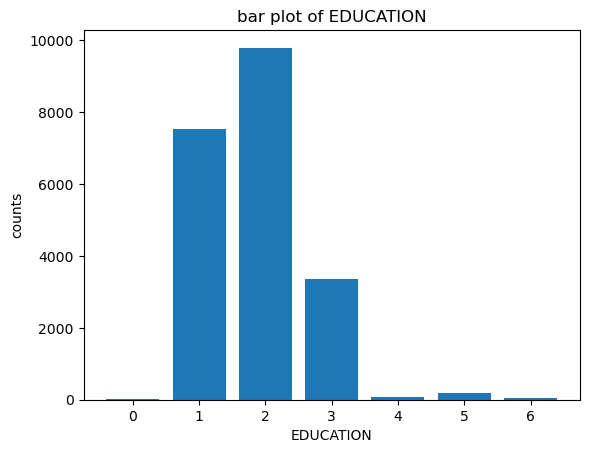

MARRIAGE
2    11225
1     9508
3      230
0       37
Name: count, dtype: int64


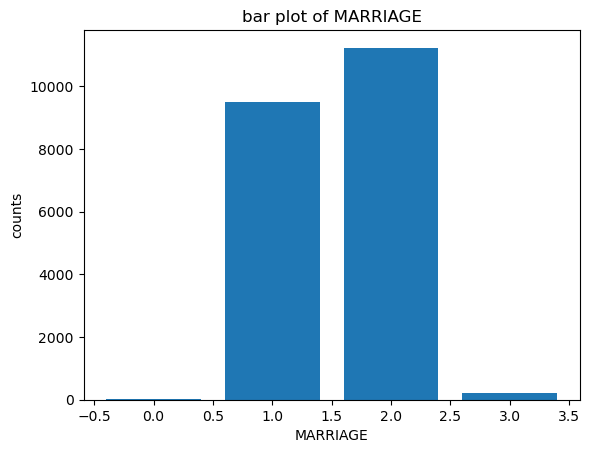

SEX
2    12692
1     8308
Name: count, dtype: int64


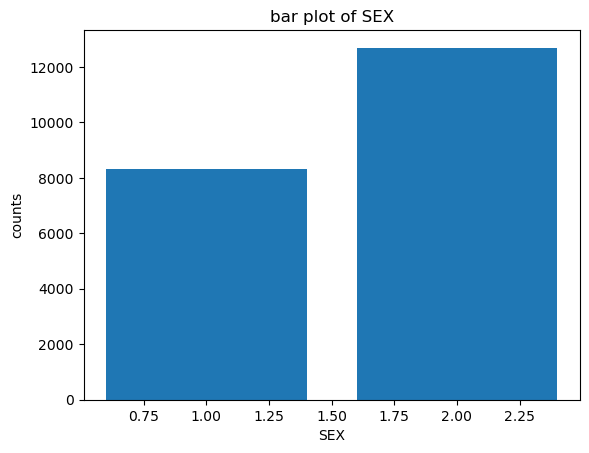

In [62]:
# categorical variable bar plots
cat_features = ['EDUCATION', 'MARRIAGE', "SEX"]

for feat in cat_features:
    summary =  X_train[feat].value_counts()
    print(summary)
    plt.bar(summary.index, summary)
    plt.xlabel(feat)
    plt.ylabel('counts')
    plt.title( 'bar plot of ' + feat)
    plt.show()

The `EDUCATION` feature mostly consists of three classes: graduate, university, and high school. The `MARRIAGE` feature mostly consists of two classes: single and married. There are a few other classes but they are very rare, so I'd say we could still include them and replace their values into one single class. The `SEX` feature is binary according to the data, and female is around 50% more than male.

In [63]:
# check correlations among features using the correlation matrix table (heatmap-alike)
temp_cols = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
             'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6',
             "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"
            ]
temp_cols.append("default.payment.next.month")
subset_train = train_df[temp_cols]
corr = subset_train.corr()
corr.style.background_gradient(cmap ='coolwarm')

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default.payment.next.month
PAY_0,1.000000,0.670631,0.567774,0.533273,0.505056,0.469922,-0.076233,-0.069350,-0.074290,-0.060165,-0.057405,-0.059551,0.180066,0.183840,0.170825,0.171457,0.172905,0.169537,0.323523
PAY_2,0.670631,1.000000,0.762293,0.660931,0.620848,0.571709,-0.078910,-0.062041,-0.054683,-0.046492,-0.036637,-0.035437,0.231105,0.232240,0.217288,0.218397,0.215573,0.214050,0.260467
PAY_3,0.567774,0.762293,1.000000,0.775033,0.684199,0.628208,0.000973,-0.066903,-0.054439,-0.045195,-0.041487,-0.036738,0.206371,0.235810,0.224068,0.225476,0.221527,0.218245,0.224477
PAY_4,0.533273,0.660931,0.775033,1.000000,0.820376,0.715698,-0.009275,-0.001426,-0.070151,-0.043360,-0.035096,-0.026607,0.200885,0.224500,0.243231,0.245591,0.241180,0.237283,0.206372
PAY_5,0.505056,0.620848,0.684199,0.820376,1.000000,0.816568,-0.008082,-0.005511,0.010729,-0.055934,-0.035162,-0.024185,0.202593,0.222808,0.239077,0.271176,0.268341,0.260575,0.197064
PAY_6,0.469922,0.571709,0.628208,0.715698,0.816568,1.000000,-0.004037,-0.004361,0.010255,0.019881,-0.048407,-0.025871,0.201666,0.221067,0.236743,0.265935,0.290063,0.284130,0.183982
PAY_AMT1,-0.076233,-0.078910,0.000973,-0.009275,-0.008082,-0.004037,1.000000,0.265325,0.259930,0.208397,0.140164,0.201867,0.135282,0.270965,0.236282,0.223024,0.210422,0.189783,-0.071237
PAY_AMT2,-0.069350,-0.062041,-0.066903,-0.001426,-0.005511,-0.004361,0.265325,1.000000,0.262783,0.199739,0.202414,0.165999,0.088677,0.082672,0.327073,0.201283,0.181831,0.178020,-0.054863
PAY_AMT3,-0.074290,-0.054683,-0.054439,-0.070151,0.010729,0.010255,0.259930,0.262783,1.000000,0.233543,0.154524,0.147888,0.134620,0.127687,0.119061,0.283680,0.241139,0.221600,-0.055178
PAY_AMT4,-0.060165,-0.046492,-0.045195,-0.043360,-0.055934,0.019881,0.208397,0.199739,0.233543,1.000000,0.137263,0.155273,0.152605,0.142834,0.143166,0.128874,0.296507,0.253981,-0.048593


We can see from the correlation table above that `BILL_AMT1` is highly correlated with `BILL_AMT2` (.95), `BILL_AMT2` is highly correlated with `BILL_AMT3` (.92), `BILL_AMT3` is highly correlated with `BILL_AMT4` (.92), and so on and so forth. Therefore, the information given by `BILL_AMT1` to `BILL_AMT6` might be redundant and repeated. We can only use one of them with the highest correlation coefficient with `default.payment.next.month`: `BILL_AMT1`.

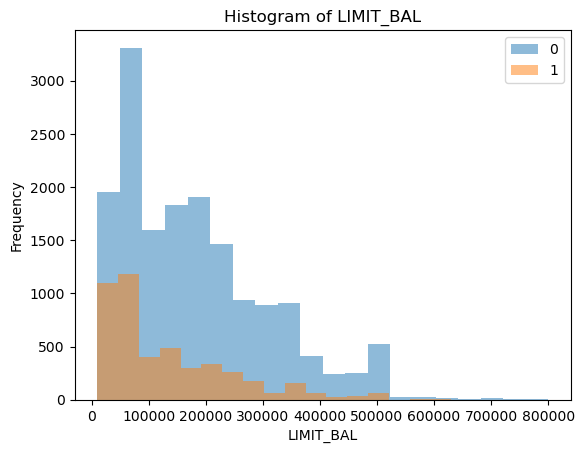

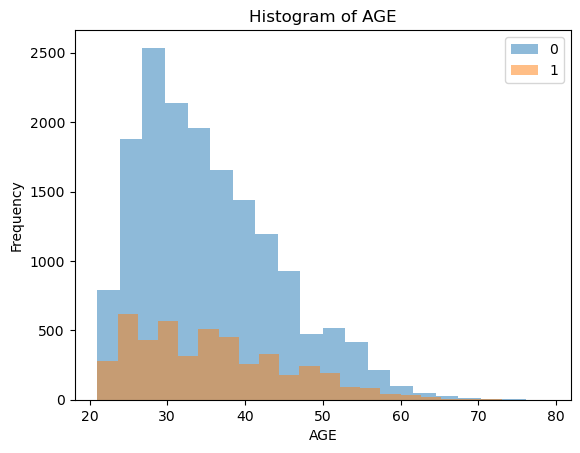

In [64]:
# numerical features histograms I.
num_features = ['LIMIT_BAL', 'AGE']
# for num in num_features:
#     plt.hist(X_train[num], bins=50)
#     plt.xlabel(num)
#     plt.ylabel('frequency')
#     plt.title('histogram of ' +  num)
#     plt.show()

temp_cols = num_features[:]
temp_cols.append("default.payment.next.month")
# print(temp_cols)
subset_train = train_df[temp_cols]
# subset_train.head()
num_col = subset_train.shape[1]
for i, feat in enumerate(subset_train.columns):
    ax = subset_train.groupby("default.payment.next.month")[feat]
    if feat != 'default.payment.next.month':
        ax.plot.hist(bins=20, alpha=0.5, legend=True)
        plt.xlabel(feat)
        plt.title("Histogram of " + feat)
        plt.show()

From the histograms above, it seems like both `LIMIT_BAL` and `AGE` alone are not good features to classify default payment status, but it might help with extreme values (for example, when age between 70 and 80, or limit greater than 500,000.)

_The dataset has some ordinal features with very high correlations, which might be dropped in preprocessing, numerical features with great differences in the scale, which requires standard scaling, and a target with unbalanced classes which needs oversampling to deal with. Since we are to predict the class for new example, one way is that we could consider it as a classification problem to look at the confusion matrix and calculate related metrics such as recall, accuracy, and precision. We can also fit a logistic model to the data and treat it as a prediction problem, as the target is binary._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

Data Cleaning

In [65]:
# replace "others" class into appropriate classes

train_df['EDUCATION'] = train_df['EDUCATION'].replace({5:4, 6:4})
train_df['PAY_0'] = train_df['PAY_0'].replace({-2:-1, 0:-1})
train_df['PAY_2'] = train_df['PAY_2'].replace({-2:-1, 0:-1})
train_df['PAY_3'] = train_df['PAY_3'].replace({-2:-1, 0:-1})
train_df['PAY_4'] = train_df['PAY_4'].replace({-2:-1, 0:-1})
train_df['PAY_5'] = train_df['PAY_5'].replace({-2:-1, 0:-1})
train_df['PAY_6'] = train_df['PAY_6'].replace({-2:-1, 0:-1})

In [66]:
# separate X and y
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]

X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

1. Identify features and transformations

In [125]:
# features to drop: id - as it is not associated with the target; BILL_AMT*5 - as they are redundant and highly correlated with 
# each other and BILL_AMT1
drop_features = ['ID', "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]

numeric_features = num_features+ ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'BILL_AMT1']

binary_feature = ["SEX"]

categorical_features = ['MARRIAGE']

# Education = ["1","2", "3", "4", "5", "6", "0"]
# Pay = ["-1", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
Education = [-1,0,1, 2, 3]
Pay = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ordinal_features = ['EDUCATION', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']


In [126]:
# Change integer data type ordinal columns into strings
# X_train[ordinal_features]= X_train[ordinal_features].astype(str)

2. Define a column transformer

In [127]:
from sklearn.impute import SimpleImputer

preprocessor = make_column_transformer(
    (make_pipeline(StandardScaler()), numeric_features), # numerical
    
    (OrdinalEncoder(categories = [Education, Pay, Pay, Pay, Pay, Pay, Pay], handle_unknown = 'use_encoded_value', unknown_value = -1), ordinal_features), # ordinal
    # (OrdinalEncoder(categories = "auto"), ordinal_features), # ordinal
    
    (make_pipeline(OneHotEncoder(handle_unknown = 'ignore')), categorical_features), # categorical
    
    (OneHotEncoder(drop="if_binary", dtype=int, sparse_output=False), binary_feature), # binary
    
    ('drop', drop_features)
)
print(preprocessor)
# print([Education, Pay, Pay, Pay, Pay, Pay, Pay])

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['LIMIT_BAL', 'AGE', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'BILL_AMT1']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[[-1, 0, 1, 2, 3],
                                                            [-1, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9],
                                                            [-1, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9],
                                                            [-1, 1, 2, 3, 4, 5,
                                                             6, 7, 8, 9],
              

In [128]:
# for i in range(len(X_train['PAY_0'])):
#     if X_train['PAY_0'][i] == 0:
#         print(i)
type(X_train['PAY_0'][0])
ordinal_features

['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [129]:
print(type(X_train["PAY_0"][0]))

<class 'numpy.int64'>


In [130]:
preprocessor.fit_transform(X_train)

array([[ 1.32729199,  0.93990457,  0.88667417, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.24967276, -0.15465623, -0.0059896 , ...,  1.        ,
         0.        ,  1.        ],
       [-0.67400086, -1.03030486, -0.17250193, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.67400086, -0.04520015, -0.34492595, ...,  0.        ,
         0.        ,  1.        ],
       [-0.67400086, -0.92084878, -0.34492595, ...,  0.        ,
         0.        ,  1.        ],
       [-0.52005526, -0.26411231, -0.22176594, ...,  1.        ,
         0.        ,  1.        ]])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [109]:
# the helper function of getting mean and sd of cv scores
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [110]:
results_dict = {} 
dummy_model = DummyRegressor()
dummy_pipe = make_pipeline(preprocessor, dummy_model)
# print(pd.DataFrame(mean_std_cross_val_scores(dummy_pipe, X_train, y_train, return_train_score = True)).T);

# dummy_pipe.fit(X_train, y_train)
# np.sqrt(mean_squared_error(y_train, dummy_pipe.predict(X_train)))

results_dict["dummy"] = mean_std_cross_val_scores(
    dummy_pipe, X_train, y_train, return_train_score=True
)
results_df = pd.DataFrame(results_dict).T
results_df

/var/folders/25/g830b4vd3w1gyk1cpfqfdr5r0000gn/T/ipykernel_55724/1972977237.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.014 (+/- 0.006),0.006 (+/- 0.002),-0.001 (+/- 0.001),0.000 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [111]:
# Try a logistic regression model first as the target is a binary variable
lm_pipe = make_pipeline(preprocessor,LogisticRegression())
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'BILL_AMT1']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6],
                                                                             [-1,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9],
                                                                             [-1,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9],
                                                                             [-1,
                                                                              1,
                                                                              2...
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MARRIAGE']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>,
                                                                sparse_output=False),
                                                  ['SEX']),
     

In [112]:
# hyperparameters tuning: grid search

param_grid = {'logisticregression__C': 10.0**np.arange(0,6,1)}


rs = GridSearchCV(lm_pipe, 
                  param_grid = param_grid, 
                  n_jobs=-1,
                  return_train_score=True)
rs.fit(X_train, y_train)
cv_result = pd.DataFrame(rs.cv_results_)[
    [   "param_logisticregression__C",
        "mean_test_score",
        'mean_train_score',
        'mean_fit_time',
        "rank_test_score",]].set_index("rank_test_score").sort_index()
print(cv_result)

# print(rs.best_params_) # best is 100, give me 0.211 validation score
# print(rs.best_score_)

                param_logisticregression__C  mean_test_score  \
rank_test_score                                                
1                                     100.0         0.817143   
2                                    1000.0         0.817095   
2                                   10000.0         0.817095   
2                                  100000.0         0.817095   
5                                      10.0         0.817000   
6                                       1.0         0.816952   

                 mean_train_score  mean_fit_time  
rank_test_score                                   
1                        0.817060       0.059253  
2                        0.817071       0.059023  
2                        0.817071       0.059316  
2                        0.817071       0.052294  
5                        0.817048       0.073022  
6                        0.816917       0.088031  


In [113]:
# make a new model with c = 10
lm_pipe = make_pipeline(preprocessor, LogisticRegression(C = 10, random_state = 123))
cv = pd.DataFrame(cross_validate(lm_pipe, X_train, y_train))
results = {}
results_dict['logistic'] = mean_std_cross_val_scores(lm_pipe, X_train, y_train, return_train_score = True)
print(pd.DataFrame(results_dict['logistic']))
results_df = pd.DataFrame(results_dict).T
results_df

                             0
fit_time     0.030 (+/- 0.002)
score_time   0.004 (+/- 0.001)
test_score   0.817 (+/- 0.004)
train_score  0.817 (+/- 0.002)


/var/folders/25/g830b4vd3w1gyk1cpfqfdr5r0000gn/T/ipykernel_55724/1972977237.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.014 (+/- 0.006),0.006 (+/- 0.002),-0.001 (+/- 0.001),0.000 (+/- 0.000)
logistic,0.030 (+/- 0.002),0.004 (+/- 0.001),0.817 (+/- 0.004),0.817 (+/- 0.002)


_The best hyperparameter C value would be 10.0, and under C = 10, the train and test cross validation score are both .817, whereas test score has a higher standard deviation of 0.004 compared to that of train score (0.002)._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [114]:
# Random Forest
randomforest_pipe = make_pipeline(preprocessor, RandomForestRegressor(max_depth=100, n_jobs= -1))
results_dict['randomForest'] = mean_std_cross_val_scores(randomforest_pipe, X_train, y_train,return_train_score= True)
print(pd.DataFrame(results_dict['randomForest']))
results_df = pd.DataFrame(results_dict).T

                             0
fit_time     2.362 (+/- 0.279)
score_time   0.032 (+/- 0.001)
test_score   0.185 (+/- 0.009)
train_score  0.885 (+/- 0.001)


/var/folders/25/g830b4vd3w1gyk1cpfqfdr5r0000gn/T/ipykernel_55724/1972977237.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


This is an overfitting model, since the train score is very high (.885), whereas the test score is very low (.185).

In [115]:
# RBF kernel SVM
from sklearn.svm import SVC
svm_pipe = make_pipeline(preprocessor, SVC())
svm_pipe.fit(X_train, y_train)
results_dict['svm'] = mean_std_cross_val_scores(svm_pipe, X_train, y_train, return_train_score=True)
print(pd.DataFrame(results_dict['svm']))
results_df = pd.DataFrame(results_dict).T
results_df

                             0
fit_time     5.303 (+/- 0.250)
score_time   1.219 (+/- 0.039)
test_score   0.818 (+/- 0.005)
train_score  0.826 (+/- 0.001)


/var/folders/25/g830b4vd3w1gyk1cpfqfdr5r0000gn/T/ipykernel_55724/1972977237.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.014 (+/- 0.006),0.006 (+/- 0.002),-0.001 (+/- 0.001),0.000 (+/- 0.000)
logistic,0.030 (+/- 0.002),0.004 (+/- 0.001),0.817 (+/- 0.004),0.817 (+/- 0.002)
randomForest,2.362 (+/- 0.279),0.032 (+/- 0.001),0.185 (+/- 0.009),0.885 (+/- 0.001)
svm,5.303 (+/- 0.250),1.219 (+/- 0.039),0.818 (+/- 0.005),0.826 (+/- 0.001)


This is a good fitting model with high test score (.818) and train score (.826). The gap between them is also very small, indicating a good prediction.

In [117]:
# Ridge
ridge_pipe = make_pipeline(preprocessor,Ridge())
ridge_pipe.fit(X_train, y_train)
results_dict['ridge'] = mean_std_cross_val_scores(ridge_pipe, X_train, y_train,return_train_score= True)
print(pd.DataFrame(results_dict['ridge']))
results_df = pd.DataFrame(results_dict).T
results_df

                             0
fit_time     0.014 (+/- 0.003)
score_time   0.005 (+/- 0.003)
test_score   0.177 (+/- 0.011)
train_score  0.180 (+/- 0.003)


/var/folders/25/g830b4vd3w1gyk1cpfqfdr5r0000gn/T/ipykernel_55724/1972977237.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.014 (+/- 0.006),0.006 (+/- 0.002),-0.001 (+/- 0.001),0.000 (+/- 0.000)
logistic,0.030 (+/- 0.002),0.004 (+/- 0.001),0.817 (+/- 0.004),0.817 (+/- 0.002)
randomForest,2.362 (+/- 0.279),0.032 (+/- 0.001),0.185 (+/- 0.009),0.885 (+/- 0.001)
svm,5.303 (+/- 0.250),1.219 (+/- 0.039),0.818 (+/- 0.005),0.826 (+/- 0.001)
ridge,0.014 (+/- 0.003),0.005 (+/- 0.003),0.177 (+/- 0.011),0.180 (+/- 0.003)


The model is an underfitting model, as test score and train score were very close but both are very low (.177 and .180). However, its fitting time and scoring time are both very quick, the same as dummy and logistic model.

To conclude, all three models above have worse performance compared to logistic model. Their test score are not as high as logistic, and they are either overfitting or underfitting. Some of them also takes much longer to fit and score.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

In [118]:
# Random Forest
param_grid = {'randomforestregressor__n_estimators': 2**np.arange(1,10,1),
               'randomforestregressor__max_depth': 10*np.arange(1,20,1),
              'randomforestregressor__max_features': 2*np.arange(1,8,1),
}

rs_randomforest = RandomizedSearchCV(randomforest_pipe,
                        param_distributions = param_grid, 
                        n_iter=20, 
                        n_jobs=-1,
                        return_train_score=True)
rs_randomforest.fit(X_train, y_train)
cv_result = pd.DataFrame(rs_randomforest.cv_results_)[
    [   "param_randomforestregressor__n_estimators",
        "param_randomforestregressor__max_depth",
        "param_randomforestregressor__max_features",
        "mean_test_score",
        'mean_train_score',
        'mean_fit_time',
        "rank_test_score",]].set_index("rank_test_score").sort_index()
print(cv_result)

print(rs_randomforest.best_params_)
print(rs_randomforest.best_score_)

                param_randomforestregressor__n_estimators  \
rank_test_score                                             
1                                                     128   
2                                                     128   
3                                                     256   
4                                                     512   
5                                                     128   
6                                                     256   
7                                                      64   
8                                                      64   
9                                                      64   
10                                                     32   
11                                                     16   
12                                                     16   
13                                                     16   
14                                                      8   
15                      

The best max_depth for RandomForest is 20, best n_estimators is 128, and best max_features is 8. Their corresponding train score is .783 and test score is .203.

In [119]:
# SVM
param_grid = {
    "svc__gamma": [0.001, 0.01, 0.1, 1.0, 10, 100],
    "svc__C": np.linspace(2, 3, 6),
}

# Create a random search object
# randomly select some of them and do a selection
random_search = RandomizedSearchCV(svm_pipe,                                    
                  param_distributions = param_grid, 
                  n_iter=50,  
                  n_jobs=-1, 
                  return_train_score=True)

# Carry out the search
random_search.fit(X_train, y_train)
# print(pd.DataFrame(random_search.cv_results_).set_index("rank_test_score").sort_index().T)

print(
    pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_svc__gamma",
        "param_svc__C",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T
)

/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/miniconda3/envs/cpsc330/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


rank_test_score          1          2          2         4          5   \
mean_test_score    0.816857   0.816476   0.816476  0.816286    0.81619   
param_svc__gamma        0.1        0.1        0.1       0.1        0.1   
param_svc__C            2.0        2.2        2.4       2.6        2.8   
mean_fit_time     17.275781  16.047934  17.733293  17.39589  17.950978   

rank_test_score          6          7          8          9         10  \
mean_test_score    0.816095   0.814762   0.814667   0.814381  0.814143   
param_svc__gamma        0.1       0.01       0.01       0.01      0.01   
param_svc__C            3.0        3.0        2.8        2.6       2.0   
mean_fit_time     18.061654  14.612441  13.144391  13.899846  13.27162   

rank_test_score          10         10         13         13       15  \
mean_test_score    0.814143   0.814143   0.811333   0.811333  0.81019   
param_svc__gamma       0.01       0.01      0.001      0.001    0.001   
param_svc__C            2.2        2.4 

The best gamma for SVM is 0.1, best c is 2. Their corresponding train score is .836 and test score is .817.

In [121]:
# Ridge
param_grid = {'ridge__alpha': 10.0**np.arange(0,6,1)}

rs_ridge = GridSearchCV(ridge_pipe,
                        param_grid = param_grid, 
                        n_jobs=-1,
                        return_train_score=True)
rs_ridge.fit(X_train, y_train)
cv_result = pd.DataFrame(rs_ridge.cv_results_)[
    [   "param_ridge__alpha",
        "mean_test_score",
        'mean_train_score',
        'mean_fit_time',
        "rank_test_score",]].set_index("rank_test_score").sort_index()
print(pd.DataFrame(cv_result))
print(rs_ridge.best_params_)
print(rs_ridge.best_score_)

                param_ridge__alpha  mean_test_score  mean_train_score  \
rank_test_score                                                         
1                            100.0         0.177356          0.179544   
2                             10.0         0.177343          0.179698   
3                              1.0         0.177289          0.179710   
4                           1000.0         0.176418          0.178352   
5                          10000.0         0.157646          0.159108   
6                         100000.0         0.073034          0.074094   

                 mean_fit_time  
rank_test_score                 
1                     0.019554  
2                     0.019533  
3                     0.020790  
4                     0.020192  
5                     0.024237  
6                     0.017943  
{'ridge__alpha': 100.0}
0.1773561411722558


The best alpha value for Ridge is 100, and its corresponding train score is .179 and test score is .177.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

After the hyperparameter optimization, we found that SVM performs better than other models.

In [135]:
dict_value={}
svm_optimal = make_pipeline(preprocessor, SVC(gamma = 0.1, C = 2))
svm_optimal.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'BILL_AMT1']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[-1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3],
                                                                             [-1,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9],
                                                                             [-1,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9],
                                                                             [-1,
                                                                              1,
                                                                              2,
                                                                              3,...
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MARRIAGE']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>,
                                                                sparse_output=False),
                                                  ['SEX']),
                                                 ('drop', 'drop',
                  

In [136]:
dict_value["SVM"]=pd.DataFrame(mean_std_cross_val_scores(svm_optimal, X_train, y_train, return_train_score = True))
print(pd.DataFrame(mean_std_cross_val_scores(svm_optimal, X_train, y_train, return_train_score = True)))

/var/folders/25/g830b4vd3w1gyk1cpfqfdr5r0000gn/T/ipykernel_55724/1972977237.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


                             0
fit_time     6.371 (+/- 0.565)
score_time   1.423 (+/- 0.360)
test_score   0.817 (+/- 0.004)
train_score  0.836 (+/- 0.001)


/var/folders/25/g830b4vd3w1gyk1cpfqfdr5r0000gn/T/ipykernel_55724/1972977237.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [132]:
svm_optimal.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'BILL_AMT1']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[-1,
                                                                              0,
                                                                              1,
                                                                              2,
                                                                              3],
                                                                             [-1,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9],
                                                                             [-1,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7,
                                                                              8,
                                                                              9],
                                                                             [-1,
                                                                              1,
                                                                              2,
                                                                              3,...
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MARRIAGE']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>,
                                                                sparse_output=False),
                                                  ['SEX']),
                                                 ('drop', 'drop',
                  

In [134]:
svm_optimal.score(X_test, y_test)

0.5434444444444444

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

In [150]:
dict_value["SVM"] = dict_value["SVM"].T

In [152]:
dict_value["SVM"]["real_test_score"]=svm_optimal.score(X_test, y_test)

In [155]:
dict_value["SVM"].index = ["SVM"]
dict_value["SVM"]

,fit_time,score_time,test_score,train_score,real_test_score
SVM,6.196 (+/- 0.100),1.264 (+/- 0.021),0.817 (+/- 0.004),0.836 (+/- 0.001),0.543444


The SVM model results in a high training score and cross validation score - `test_score`, which are both around 0.8. However, the real test score on the test data is only 0.54.

Perhaps we can try other types of models next time, such as LGBM Regressor. In addition, we can also look closer to the importance of different features using SHAP or dependence test, and weigh each feature respectively.

<!-- END QUESTION -->

<br><br>

<div class="alert alert-warning">
    
Solution_10
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.

This was a tricky one but you did it!